In [1]:
import pandas as pd
import numpy as np

In [2]:
data=pd.read_csv('/content/Transactions Data.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  float64
 10  isFlaggedFraud  179013 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.0+ MB


In [9]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,179014.000000,1.790140e+05,1.790130e+05,1.790130e+05,1.790130e+05,1.790130e+05,179013.000000,179013.0
mean,9.739222,1.801320e+05,8.915856e+05,9.089488e+05,9.272605e+05,1.188120e+06,0.000776,0.0
std,1.999448,3.335828e+05,2.814423e+06,2.851534e+06,2.374230e+06,2.676059e+06,0.027855,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.166942e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,10.000000,6.566817e+04,1.976200e+04,0.000000e+00,4.233860e+04,1.163345e+05,0.000000,0.0
75%,11.000000,2.268392e+05,1.935541e+05,2.276798e+05,7.298561e+05,1.166438e+06,0.000000,0.0
max,12.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.903958e+07,3.904248e+07,1.000000,0.0


## Handle Missing Values


In [14]:
missing_values=data.isnull().sum()
missing_values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,1
newbalanceOrig,1
nameDest,1
oldbalanceDest,1
newbalanceDest,1
isFraud,1


In [18]:
#fill missing values
name_dest=data['nameDest'].mode()[0]
data['nameDest']=data['nameDest'].fillna(name_dest)

old_blnc=data['oldbalanceOrg'].median()
data['oldbalanceOrg']=data['oldbalanceOrg'].fillna(old_blnc)

new_blnc=data['newbalanceOrig'].median()
data['newbalanceOrig']=data['newbalanceOrig'].fillna(new_blnc)

old_blnc_dest=data['oldbalanceDest'].median()
data['oldbalanceDest']=data['oldbalanceDest'].fillna(old_blnc_dest)

new_blnc_dest=data['newbalanceDest'].median()
data['newbalanceDest']=data['newbalanceDest'].fillna(new_blnc_dest)

is_fraud=data['isFraud'].median()
data['isFraud']=data['isFraud'].fillna(is_fraud)

is_flagged=data['isFlaggedFraud'].median()
data['isFlaggedFraud']=data['isFlaggedFraud'].fillna(is_flagged)

missing_values=data.isnull().sum()
missing_values

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,0
isFraud,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179014 non-null  object 
 4   oldbalanceOrg   179014 non-null  float64
 5   newbalanceOrig  179014 non-null  float64
 6   nameDest        179014 non-null  object 
 7   oldbalanceDest  179014 non-null  float64
 8   newbalanceDest  179014 non-null  float64
 9   isFraud         179014 non-null  float64
 10  isFlaggedFraud  179014 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.0+ MB


In [21]:
#convert value from float to int because it contain binary values 0 and 1 (Yes or No)
data['isFraud']=data['isFraud'].astype(int)
data['isFlaggedFraud']=data['isFlaggedFraud'].astype(int)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179014 non-null  object 
 4   oldbalanceOrg   179014 non-null  float64
 5   newbalanceOrig  179014 non-null  float64
 6   nameDest        179014 non-null  object 
 7   oldbalanceDest  179014 non-null  float64
 8   newbalanceDest  179014 non-null  float64
 9   isFraud         179014 non-null  int64  
 10  isFlaggedFraud  179014 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 15.0+ MB


## Check Duplicate Values

In [24]:
duplicate_values=data.duplicated().sum()
duplicate_values

0

In [61]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le=LabelEncoder()
data['type']=le.fit_transform(data['type'])

In [32]:
x = data.drop(columns=['isFraud', 'isFlaggedFraud', 'nameOrig', 'nameDest'])
y = data['isFraud']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [34]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()

In [35]:
model.fit(X_train,y_train)

RandomForestClassifier()

In [36]:
model.score(X_test,y_test)

0.9994413875932184

In [38]:
model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [41]:
y_predicted=model.predict(X_test)
y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [58]:
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.9994413875932184

In [60]:
classification=classification_report(y_test,y_predicted)
print(classification)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35769
           1       0.89      0.47      0.62        34

    accuracy                           1.00     35803
   macro avg       0.94      0.74      0.81     35803
weighted avg       1.00      1.00      1.00     35803



In [57]:
confusion=confusion_matrix(y_test,y_predicted)
confusion

array([[35767,     2],
       [   18,    16]])

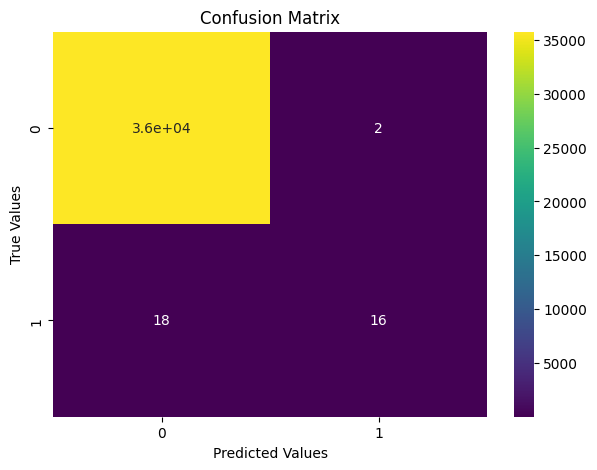

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(7,5))
sns.heatmap(confusion, annot=True,cmap='viridis')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()